Simple linear regression coefficents: [[0.27686542]]
Simple linear regression coefficients: [37.05858158]
Multiple linear regression coefficients: [0.15705846 0.20300944 0.14651308 0.3466355 ]
Multiple linear regression intercept: 25.829968920832513
[[329  15]
 [100  34]]


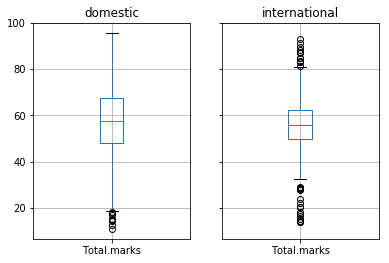

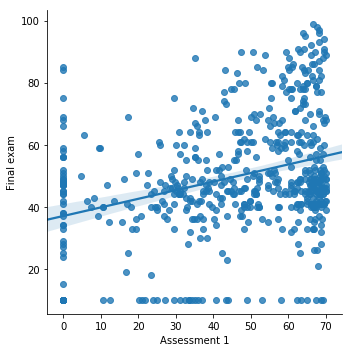

In [11]:
import pandas as pd 
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Part a 
# Use pd.read_csv to extract data from csv file. The file needs to be saved as the same profile as ipython. Otherwise, a correct directory need to be filled so that system can locate the file
dataset = pd.read_csv('student_results.csv') 

# Part b
# [file’s name].fillna() replace all NA by given value (filled inside the bracket, which, in this case is 0).
dataset = dataset.fillna(0)
 
#Part c
# len() measure the length/ how many rows of data in the dataset. 
n = len(dataset) 
Full_marks = pd.Series([70, 30, 70, 30, 30, 20, 30, 20, 30, 20, 50, 2, 100], index = ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 'Online quiz 2', 'Online quiz 3', 'Online quiz 4', 'Group assignment 1', 'Group assignment 2', 'Assessment 3', 'Assessment 4', 'Group assignment 3', ' Group evaluation', 'Final exam']) 
Weights = pd.Series([0.07, 0.03, 0.07, 0.03, 0.03, 0.02, 0.03, 0.02, 0.024, 0.016, 0.04, 0.02, 0.6], index = ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 'Online quiz 2', 'Online quiz 3', 'Online quiz 4', 'Group assignment 1', 'Group assignment 2', 'Assessment 3', 'Assessment 4', 'Group assignment 3', ' Group evaluation', 'Final exam']) 
dataset['Total.marks'] = (dataset.loc[0:n, ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 'Online quiz 2', 'Online quiz 3', 'Online quiz 4', 'Group assignment 1', 'Group assignment 2', 'Assessment 3', 'Assessment 4', 'Group assignment 3', ' Group evaluation', 'Final exam']] / Full_marks * Weights * 100).sum(1)

dataset.loc[0:n, ['Total.marks', 'Student category']].groupby('Student category').boxplot()

#Part d 
dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').mean()
dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').var()
dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').std()

#Part e
Class = ['Fail', 'Pass', 'Credit', 'Distinction', 'High Distinction']
Interval = [0, 50, 65, 75, 85, 100.01]
dataset['Grade'] = pd.cut(dataset['Total.marks'], right = False, bins = Interval, labels = Class)

#Part f
linreg = LinearRegression(fit_intercept = True)
x = dataset[['Assessment 1']]
y = dataset[['Final exam']]
linreg.fit(x, y)
print('Simple linear regression coefficents:', linreg.coef_)
print('Simple linear regression coefficients:', linreg.intercept_)
df = pd.DataFrame(dataset.loc[0:n, ['Final exam', 'Assessment 1']])
sb.lmplot("Assessment 1", "Final exam", df)

#Part g
x = dataset[['Assessment 1', 'Assessment 3', 'Online quiz 1 ', 'Group assignment 2']]
y = dataset['Final exam'] 
mlr = LinearRegression(fit_intercept = True)
mlr.fit(x, y)
print('Multiple linear regression coefficients:', mlr.coef_)
print('Multiple linear regression intercept:', mlr.intercept_)

#Part h
dataset.loc[dataset['Grade'] == 'Fail', 'Status'] = 'Incomplete'
dataset.loc[dataset['Grade'] != 'Fail', 'Status'] = 'Complete'
x_tr = dataset.loc[0:99, ['Assessment 3']]
y_tr = dataset.loc[0:99, ['Status']]
x_te = dataset.loc[100:n, ['Assessment 3']]
y_te = dataset.loc[100:n, ['Status']]
logreg = LogisticRegression()
logreg.fit(x_tr, y_tr.values.ravel()) 
x_pre = logr.predict(x_te)
mtc_matrix = metrics.confusion_matrix(y_te, x_pre)
print(mtc_matrix)